This notebook plots with seaborn the confusion matrix. It also prints the classification report out of this confusion matrix.

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
def get_classification_report_from_confusion_matrix(confusion_matrix):# Calculate accuracy, recall, and F1-score
    conf_matrix_np = np.array(confusion_matrix)
    # Calculate true positives, false positives, and false negatives for each class
    true_positives = np.diag(conf_matrix_np)
    false_positives = np.sum(conf_matrix_np, axis=0) - true_positives
    false_negatives = np.sum(conf_matrix_np, axis=1) - true_positives

    # Calculate micro-averaged metrics
    micro_precision = np.sum(true_positives) / np.sum(true_positives + false_positives)
    micro_recall = np.sum(true_positives) / np.sum(true_positives + false_negatives)
    micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    # Calculate macro-averaged metrics
    macro_precision = np.mean(true_positives / (true_positives + false_positives))
    macro_recall = np.mean(true_positives / (true_positives + false_negatives))
    macro_f1_score = 2 * (macro_precision * macro_recall) / (macro_precision + macro_recall)

    # Calculate accuracy
    total_samples = np.sum(conf_matrix_np)
    correct_predictions = np.trace(conf_matrix_np)
    accuracy = correct_predictions / total_samples

    return accuracy, micro_precision, micro_recall, micro_f1_score, macro_precision, macro_recall, macro_f1_score



## Dotted Experiment

In [3]:
# copied from the results file with dropout 0.15
dotted_confusion_matrix =     [
        [20877, 0, 93, 31, 203, 1, 8, 12, 8, 0, 38, 1, 0, 0, 6, 0],
        [0, 297, 4, 2, 7, 0, 2, 16, 5, 0, 14, 0, 0, 0, 0, 4],
        [96, 0, 12217, 37, 100, 4, 50, 13, 15, 31, 21, 3, 0, 1, 10, 1],
        [66, 0, 36, 7074, 58, 77, 21, 28, 8, 4, 23, 1, 0, 0, 33, 2],
        [182, 0, 117, 23, 18455, 2, 194, 29, 87, 16, 48, 25, 0, 0, 13, 3],
        [1, 0, 1, 123, 1, 299, 4, 5, 0, 1, 0, 4, 0, 0, 4, 0],
        [35, 3, 63, 26, 326, 12, 5544, 35, 136, 65, 30, 73, 2, 4, 18, 4],
        [37, 30, 26, 20, 48, 6, 57, 3720, 9, 4, 47, 32, 0, 2, 22, 8],
        [25, 8, 16, 8, 24, 1, 124, 2, 2687, 10, 12, 0, 0, 0, 20, 4],
        [9, 1, 27, 0, 37, 0, 16, 0, 17, 1330, 11, 0, 0, 0, 0, 0],
        [143, 34, 54, 22, 57, 4, 29, 67, 11, 17, 8082, 6, 1, 0, 10, 10],
        [4, 0, 6, 4, 25, 6, 19, 19, 9, 1, 9, 787, 0, 1, 4, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 32, 0, 0],
        [29, 2, 7, 25, 7, 1, 33, 8, 35, 1, 13, 0, 1, 0, 3242, 8],
        [2, 5, 2, 10, 13, 3, 11, 14, 4, 0, 4, 0, 0, 0, 7, 223],
    ]

In [4]:
accuracy, micro_precision, micro_recall, micro_f1_score, macro_precision, macro_recall, macro_f1_score = get_classification_report_from_confusion_matrix(confusion_matrix=dotted_confusion_matrix)
accuracy, macro_precision,macro_recall,macro_f1_score

(0.9501365814338811, 0.8671601771924096, 0.8841509499383995, 0.87557314349908)

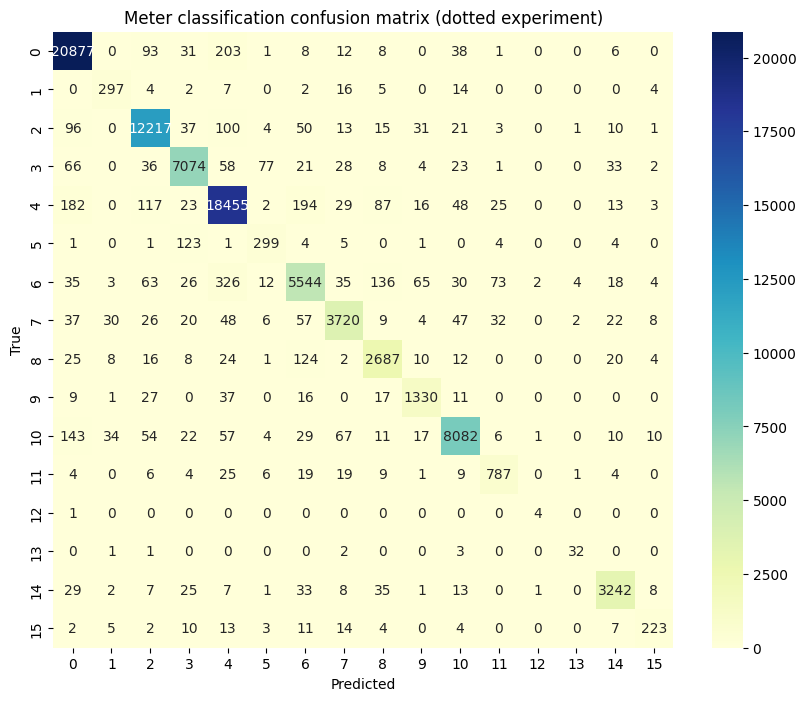

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(dotted_confusion_matrix, annot=True, cmap="YlGnBu", fmt='d', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Meter classification confusion matrix (dotted experiment)')
plt.show()

## Dotless Experiment

In [6]:
# copied from the results file with dropout 0.15
dotless_confusion_matrix = [
        [20864, 0, 107, 35, 257, 2, 27, 12, 7, 0, 43, 1, 0, 0, 21, 0],
        [1, 307, 3, 3, 7, 3, 0, 32, 1, 0, 25, 0, 0, 0, 3, 5],
        [100, 1, 12183, 35, 112, 5, 40, 10, 16, 34, 22, 5, 0, 0, 11, 2],
        [59, 1, 43, 7061, 57, 113, 32, 34, 8, 2, 26, 1, 0, 1, 31, 3],
        [209, 0, 114, 29, 18482, 3, 378, 41, 105, 32, 67, 56, 0, 0, 19, 9],
        [1, 0, 2, 87, 3, 257, 7, 4, 0, 1, 0, 3, 0, 0, 0, 0],
        [37, 3, 66, 31, 226, 6, 5223, 43, 111, 63, 48, 66, 0, 4, 30, 6],
        [36, 22, 24, 21, 42, 12, 62, 3657, 12, 5, 61, 21, 0, 2, 24, 10],
        [26, 13, 27, 10, 52, 1, 180, 7, 2680, 17, 18, 0, 0, 0, 29, 9],
        [8, 2, 30, 0, 29, 1, 34, 4, 27, 1310, 19, 0, 0, 0, 3, 0],
        [141, 27, 51, 34, 55, 3, 45, 73, 14, 9, 7997, 12, 2, 0, 17, 6],
        [3, 0, 7, 1, 14, 4, 39, 38, 9, 3, 10, 764, 2, 0, 2, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0],
        [0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 33, 0, 0],
        [21, 3, 9, 52, 14, 4, 40, 6, 41, 3, 16, 2, 1, 0, 3193, 7],
        [1, 2, 2, 5, 11, 1, 4, 9, 0, 1, 1, 1, 0, 0, 4, 210],
    ]

In [7]:
accuracy, micro_precision, micro_recall, micro_f1_score, macro_precision, macro_recall, macro_f1_score = get_classification_report_from_confusion_matrix(confusion_matrix=dotless_confusion_matrix)
accuracy, macro_precision,macro_recall,macro_f1_score

(0.9429044825578792, 0.844624254238859, 0.8588630698491114, 0.8516841535677213)

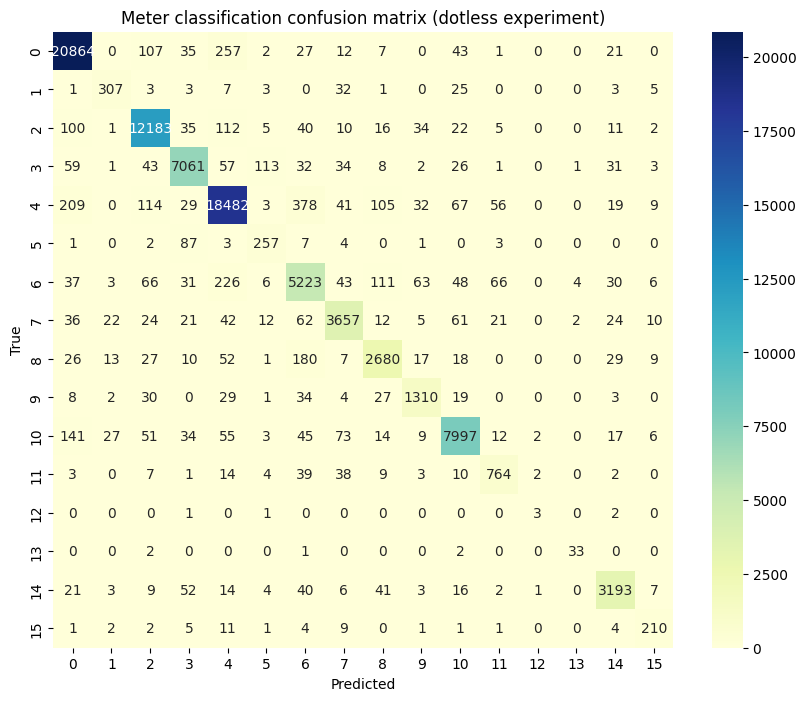

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(dotless_confusion_matrix, annot=True, cmap="YlGnBu", fmt='d', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Meter classification confusion matrix (dotless experiment)')
plt.show()